|線形モデルによる多クラス分類|
|:-|

多くの線形クラスの分類モデルは、２クラス分類にしか適用できず、自然に多クラスの場合に拡張できるものではない（ロジスティクス回帰は例外）。２クラス分類アルゴリズムを多クラス分類アルゴリズムに拡張する一般的な手法として**１対その他**（one-vs.-rest）アプローチがある。１対その他アプローチでは、各クラスに対してそのクラスと他のすべてのクラスを分類する２クラス分類モデルを学習する。クラスがたくさんある場合にはたくさんの２クラス分類モデルを使うことになる。予測の際にはすべての２クラス分類器をテストデータポイントに対して実行する。一番高いスコアのクラス分類器が「勝ち」、その分類器対応するクラスが予測結果となる。

１クラスにつき１つの２クラス分類器があるということは、クラスごとに係数ベクトル（$w$）を切片（$b$）があるということになる。下に示す各進度を表す式の値が最も大きいクラスが、クラスベクトルとして割り当てられる。$$w[0] \times x[0] + w[1] \times x[1]+ \cdots + w[p] \times x[p] + b$$

多クラスロジスティック回帰の背後にある数字は、１対その他アプローチとは少し異なるが、結局１クラスあたり係数ベクトルと切片ができるのは同じで、同じ方法で予測を行うことができる。

単純な３クラス分類データセットに対して、１対その他手法を適用してみよう。ここでは各クラスをガウス分布でサンプリングした２次元データセットを用いる。（**図2-19**）

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

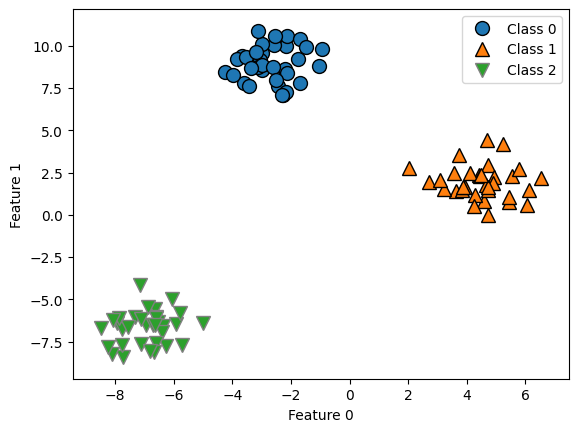

In [10]:
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

**図2-19 ３クラスからなる２次元のトイデータセット**

さて、LinearSVCクラスからなる分類器をこのデータセットで学習させてみよう。

In [12]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(x, y)
print("Coefficient shape（係数配列の形状）: ", linear_svm.coef_.shape)
print("Intercept shape（切片配列の形状）: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [13]:
print("Coefficient（係数）:\n", linear_svm.coef_)
print("Intercept（切片）:\n", linear_svm.intercept_)

Coefficient（係数）:
 [[-0.17492412  0.23140766]
 [ 0.47622012 -0.06936786]
 [-0.18914207 -0.20400079]]
Intercept（切片）:
 [-1.07745775  0.13139239 -0.08604962]


coef_配列の形は(3, 2)になっている。つまりcoef_の各行には各クラスに対応する係数ベクトルが入っており、各列には個々の特徴量（このデータセットの場合は２つ）に対する係数が格納されている。intercept_はこの場合は１次元配列になっていて、各クラスに対する切片が格納されている。

３つのクラス分類器による直線を可視化してみよう。

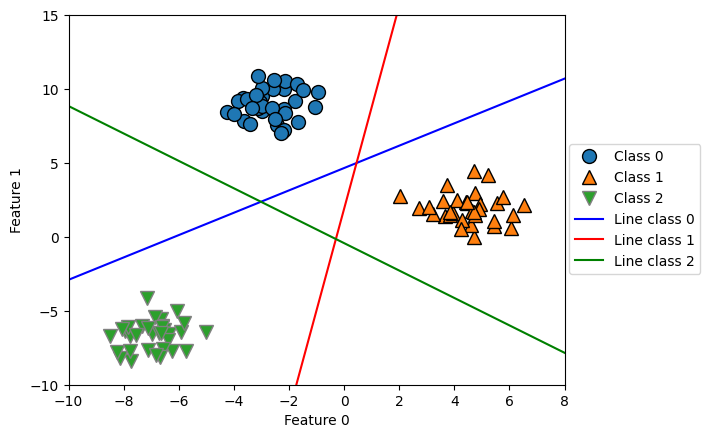

In [14]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

訓練データ中のクラス0に属するすべての点がクラス0に対応する直線よりも上にある。これはこのクラス分類器で「クラス０」に分類されたことを意味する。クラス０に属する点群は、クラス２に対応するクラス分類器で「その他」のほうに分類されたことを意味する。クラス０に属する点群は、クラス１人対応する線よりも左にある。これは、クラス１に対応するクラス分類器で「その他」の方に分類されたことを意味する。したがって、この領域にあるすべての点は、最終的な分類器によってクラス０に分類される（クラス分類確信度の式がクラス０の分類器では０より大きくなり、他の分類器では０より小さくなる）。

しかし、kのグラフの中央の三角形の部分はどうなるのだろうか？３つのクラス分類器はすべて、この領域の点を「その他」と分類する。この領域の点をどこに分類すればよいのだろうか？その答えは、「クラス分類式の値が一番大きいクラス」、つまりその点に最も近い線を持つクラスである。

下に示す例は、２次元空間すべての点に対する予測を描画したものだ（**図2-21**）。

Text(0, 0.5, 'Feature 1')

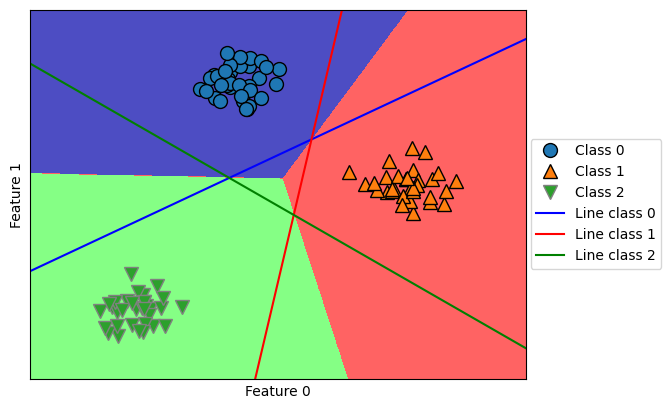

In [15]:
mglearn.plots.plot_2d_classification(linear_svm, x, fill=True, alpha=.7)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-21 ３つの一対その他クラス分類器による多クラス分類の決定境界**

線形モデルの主要なパラメータは、回帰モデルではalpha、LinearSVCとLogisticRegressionではCと呼ばれる正則化パラメータである。alphaが大きい場合、Cが小さい場合は単純なモデルに対応する。特に回帰モデルの場合、このパラメータの調整は非常に重要になる。通常、Cやalphaを調整する際には、対数スケールで値を変更する。もう一つ決めなければならないことはL1正則化を使うかL2正則化を使うかである。一部の特徴量だけが重要だと思うならば、L1を使うべきだ。そうでなければ、デフォルトとしてはL2をつかったほうがよいだろう。L1はモデルの解釈のしやすさが重要な場合にも有用である。L1を使うと小数の特徴量子化使わなくなるので、どの特徴量がそのモデルにとって重要なのか、その特徴量がどのような効果を持つのかを説明しやすい。

線形モデルの訓練は非常に高速で、さらに予測も高速である。非常に大きいデータセットにも適用できるし、疎なデータに対してもうまく機能する、サンプル数が10万点、100万点もあるようなデータに対しては、LogisticRegressionのとRidgeにsolver='sag'オプションをく買うことを県そうした方が良いだろう。このぷしょんを使うと、大きなデータセットに対して、デフォルトの場合よりも高速な場合がある。これらのクラスは、ここで述べたよりもさらに大規模なデータに適した線形モデルを実装している。